<a href="https://colab.research.google.com/github/Nchaulagai/-Data-Quality-and-XYZ-Classification/blob/main/Data_Quality_and_XYZ_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1 - Machine Learning in Supply Chain Management

Name: [Nischal Chaulagain]

Matr. No.: [03813266]

### Exercise 4 Data Quality and XYZ Classification

Consider the VN2 Inventory Planning Challenge with its data set of 599 sales time series: https://www.datasource.ai/en/home/data-science-competitions-for-startups/vn2-inventory-planning-challenge/description. The data set is also provided as `VN2_sales.csv`. In the context of the challenge, the sales time series may be used to predict weekly demand.

##### Task 1

Evaluate the data set along four distinct criteria of data quality and report quantitative evidence for each criterion. If any criterion cannot be fully assessed with the available information, state what is missing, why it matters, and a method to obtain or approximate it in practice.

In [14]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#importing the VN2_sales.csv file
df = pd.read_csv('/content/VN2_sales.csv')

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
print(f"Dataset Shape: {numeric_df.shape} (Rows: Items, Cols: Time Steps)")

Dataset Shape: (599, 159) (Rows: Items, Cols: Time Steps)


In [17]:
print("\n--- 1. Data Quality Evaluation ---")

# Criterion A: Completeness
total_cells = numeric_df.size
missing_cells = numeric_df.isna().sum().sum()
missing_pct = (missing_cells / total_cells) * 100
print(f"A. Completeness: {missing_pct:.2f}% missing values.")

# Criterion B: Validity (Negative Values)
negative_count = (numeric_df < 0).sum().sum()
print(f"B. Validity: {negative_count} negative values found.")

# Criterion C: Integrity (Zero-Inflation)
zero_count = (numeric_df == 0).sum().sum()
zero_pct = (zero_count / total_cells) * 100
print(f"C. Zero-Inflation: {zero_pct:.2f}% of all observations are zero.")

# Criterion D: Consistency (Series Length/Stability)
# Checking if rows have significant data (not just empty or all zeros)
non_zero_rows = (numeric_df.sum(axis=1) > 0).sum()
print(f"D. Consistency: {non_zero_rows} out of {len(numeric_df)} items have non-zero total sales.")




--- 1. Data Quality Evaluation ---
A. Completeness: 0.00% missing values.
B. Validity: 0 negative values found.
C. Zero-Inflation: 42.65% of all observations are zero.
D. Consistency: 599 out of 599 items have non-zero total sales.


Answer (analysis results):
A. Completeness: 0.00% missing values.
B. Validity: 0 negative values found.
C. Zero-Inflation: 42.65% of all observations are zero.
D. Consistency: 599 out of 599 items have non-zero total sales.

##### Task 2

Classify the 599 items according to an XYZ scheme based on the coefficient of variation (CV). Compute the CV for each row (store-product pair) and classify each item using the following thresholds:

| *Class* | *Threshold*              |
|--------|---------------------------|
| X      | CV ≤ 0.5                  |
| Y      | 0.5 < CV ≤ 1.0            |
| Z      | CV > 1.0                  |


In [18]:

# Part 2: XYZ Analysis

print("\n--- 2. XYZ Classification ---")

# 2a. Compute statistics
# Mean and Std Dev across the time axis (axis=1)
stats = pd.DataFrame()
stats['Mean'] = numeric_df.mean(axis=1)
stats['Std'] = numeric_df.std(axis=1)

# Calculate CV (Handle division by zero)
stats['CV'] = stats.apply(lambda row: row['Std'] / row['Mean'] if row['Mean'] > 0 else 0, axis=1)

# Function to classify
def categorize_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1.0:
        return 'Y'
    else:
        return 'Z'

stats['Class'] = stats['CV'].apply(categorize_xyz)

# 2b. Print counts and shares
class_counts = stats['Class'].value_counts().sort_index()
class_shares = stats['Class'].value_counts(normalize=True).sort_index() * 100

print("\nClass Counts:")
print(class_counts)
print("\nClass Shares (%):")
print(class_shares.round(2))




--- 2. XYZ Classification ---

Class Counts:
Class
X      8
Y     32
Z    559
Name: count, dtype: int64

Class Shares (%):
Class
X     1.34
Y     5.34
Z    93.32
Name: proportion, dtype: float64


Visualize the distribution of the CV and print the class counts and shares.

/tmp/ipython-input-2702547448.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


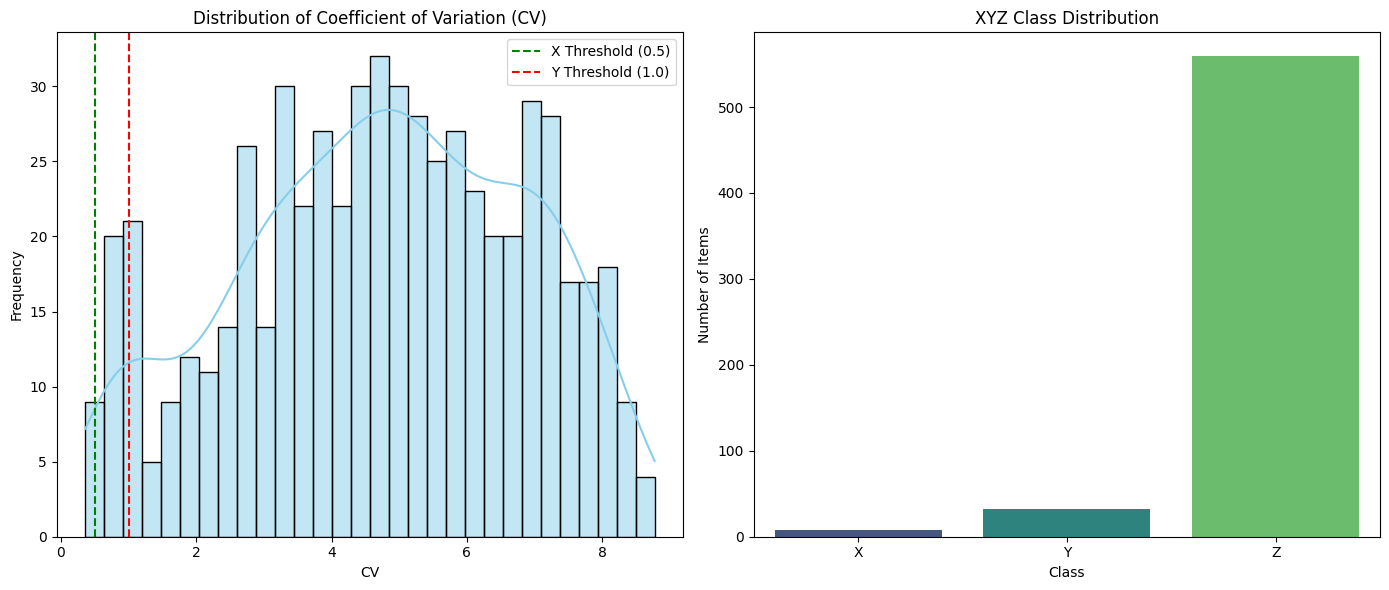


--- 2c. Implications ---
Items in Class Z (93.3%) have high volatility.


In [20]:
# Visualization
plt.figure(figsize=(14, 6))

# Histogram of CV
plt.subplot(1, 2, 1)
sns.histplot(stats['CV'], bins=30, kde=True, color='skyblue')
plt.axvline(0.5, color='green', linestyle='--', label='X Threshold (0.5)')
plt.axvline(1.0, color='red', linestyle='--', label='Y Threshold (1.0)')
plt.title('Distribution of Coefficient of Variation (CV)')
plt.xlabel('CV')
plt.ylabel('Frequency')
plt.legend()

# Bar Chart of Classes
plt.subplot(1, 2, 2)
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('XYZ Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Items')

plt.tight_layout()
plt.show()

#Output

print("\n--- 2c. Implications ---")
print(f"Items in Class Z ({class_shares.get('Z', 0):.1f}%) have high volatility.")

Briefly discuss the implications of the resulting class mix for predicting demand.

Answer: The result suggests that the class Z has high volatility with 93.3% and point forecasts will be unreliable therefore use of safety stocks or probabilistic forecasting fot Z items is recommended.


*Reference: Used Google Gemini and Notebook for coding supervision